# Fashion - MNIST
[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) is a set of 28x28 greyscale images of clothes.
<img src='fashion-mnist.png' width=500px>
It can be downloaded and then used using DataLoader

## 0. Imports

In [1]:
import torch
from torchvision import datasets, transforms
import helper
from torch import nn, optim
import torch.nn.functional as F


In [2]:
# Transform and normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Train Size: 938
Test Size: 157



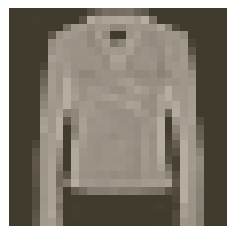

In [3]:
print('Train Size: {}\nTest Size: {}'.format(len(trainloader),len(testloader)))
print()
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [5]:
image.shape

torch.Size([64, 1, 28, 28])

In [6]:
28*28

784

## 1. Network Architecture

In [7]:
class classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,256)
        self.fc2 = nn.Linear(256,128)
        self.fc3 = nn.Linear(128,64)
        self.output = nn.Linear(64,10)
    
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.output(x),dim = 1)
        return x
        

In [10]:
model = classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)
model

classifier(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

## 2. Training the network

In [11]:
EPOCHS = 6
for epoch in range(EPOCHS):
    r_loss = 0
    for images, labels in trainloader:
        probs = model.forward(images)
        loss = criterion(probs,labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        r_loss += loss.item()
    else:
        print('EPOCH:{}\tTrain Loss:{}'.format(epoch,r_loss/len(trainloader)))

EPOCH:0	Train Loss:0.5115155641362865
EPOCH:1	Train Loss:0.39290264884291937
EPOCH:2	Train Loss:0.354232973802382
EPOCH:3	Train Loss:0.3365828950188434
EPOCH:4	Train Loss:0.31446700961763924
EPOCH:5	Train Loss:0.30111058388374


## 3. Evaluation

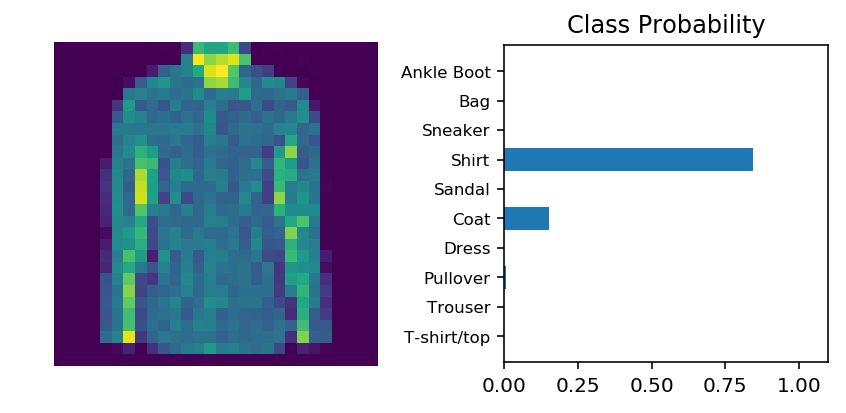

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')